# Join Fields using their WCS

In [1]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject.mosaicking import reproject_and_coadd
from reproject import reproject_interp, reproject_exact

from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.io import fits
import astropy.units as u

import pandas as pd
import numpy as np
import glob
import os

bands = [ 'R', 'G', 'I', 'U', 'Z', 'F378', 'F395', 'F410', 'F430', 'F515', 'F660', 'F861' ]
home = '/home/jpcalderon/2023/Fornax/notebooks/UDGs+GCs/'
fits_dir = home + 'fits/'
outs_dir = home + 'output/'

for folder in [ fits_dir, outs_dir ]:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [2]:
fields =  [ 'SPLUS-s27s34', 'SPLUS-s27s33' ] #, 'SPLUS-s28s33', 'SPLUS-s28s34', 'SPLUS-s27s35' ]

for band in [ 'G' ]:
    print ( "[*] Proccesing " +  band )
    images =  [ fits.open(fits_dir + field + '_' + band + '_swp.fits') for field in fields ]

    wcs_out, shape_out = find_optimal_celestial_wcs ( images )
    array, footprint = reproject_and_coadd ( images, wcs_out, shape_out = shape_out, input_weights = None, 
                                            hdu_in = None, reproject_function = reproject_interp, hdu_weights = None, 
                                            combine_function = 'mean', match_background = False, 
                                            background_reference = None )
    
    file = outs_dir + 'SPLUS-' + band + '_v.fits'
    
    print ( "[*] Writing file: " + file )
    fits.writeto ( file, array, wcs_out.to_header(), overwrite = True )
print ( "[*] Done!" )

[*] Proccesing G


[*] Writing file: /home/jpcalderon/2023/Fornax/notebooks/UDGs+GCs/output/SPLUS-G_v.fits
[*] Done!


There are other options for the reproject_function variable. See the manual for reproject_and_coadd: https://reproject.readthedocs.io/en/stable/index.html

Text(0.5, 1.0, 'Footprint')

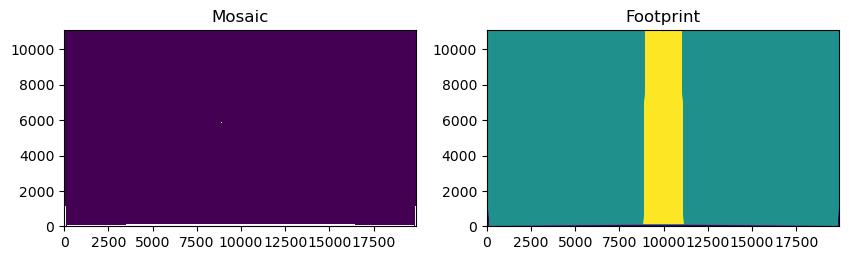

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 2, 1)
im1 = ax1.imshow(array, origin='lower', vmin=600, vmax=800)
ax1.set_title('Mosaic')
ax2 = plt.subplot(1, 2, 2)
im2 = ax2.imshow(footprint, origin='lower')
ax2.set_title('Footprint')